

# Project: Investigate a Dataset - [no show appointment ]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>>This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.
>>
01 - PatientId
Identification of a patient
>>
02 - AppointmentID
Identification of each appointment
>>
03 - Gender
Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
>>
04 - DataMarcacaoConsulta
The day of the actuall appointment, when they have to visit the doctor.
>>
05 - DataAgendamento
The day someone called or registered the appointment, this is before appointment of course.
>>
06 - Age
How old is the patient.
>>
07 - Neighbourhood
Where the appointment takes place.
>>
08 - Scholarship
True of False .
>>
09 - Hipertension
True or False
>>
10 - Diabetes
True or False
>>
Alcoholism
True or False
>>
Handcap
True or False
>>
SMS_received
1 or more messages sent to the patient.
>>
No-show
True or False.
    </ol>

### Question(s) for Analysis
>1- Does receiving a message increase the likelihood of appearing for the appointment?

>2- What are the ages most committed to appearing for the date?




In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0
!pip install pandas

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

>in this part i will expoler data ,check if Their is any Incorrect value and fix them



In [3]:
# Load data
df= pd.read_csv("./Database/noshowappointments.csv")

In [4]:
df.head(6)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No


In [5]:
#print summery of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


as shown from above Information thire is in correct data tyoe for ScheduledDay and AppointmentDay
they should be a datetime types . 


In [6]:
# Convert ScheduledDay to datetime type
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)


In [7]:
# Convert ScheduledDay to datetime type
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns, UTC]
AppointmentDay    110527 non-null datetime64[ns, UTC]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns, UTC](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [9]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


thire is  Incorrect Value in min age which is a -1 


In [10]:
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [11]:
# drop incorrect value
df.drop(df.query("Age == -1").index,inplace=True)

In [12]:
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9073aa0710>,
      dtype=object)

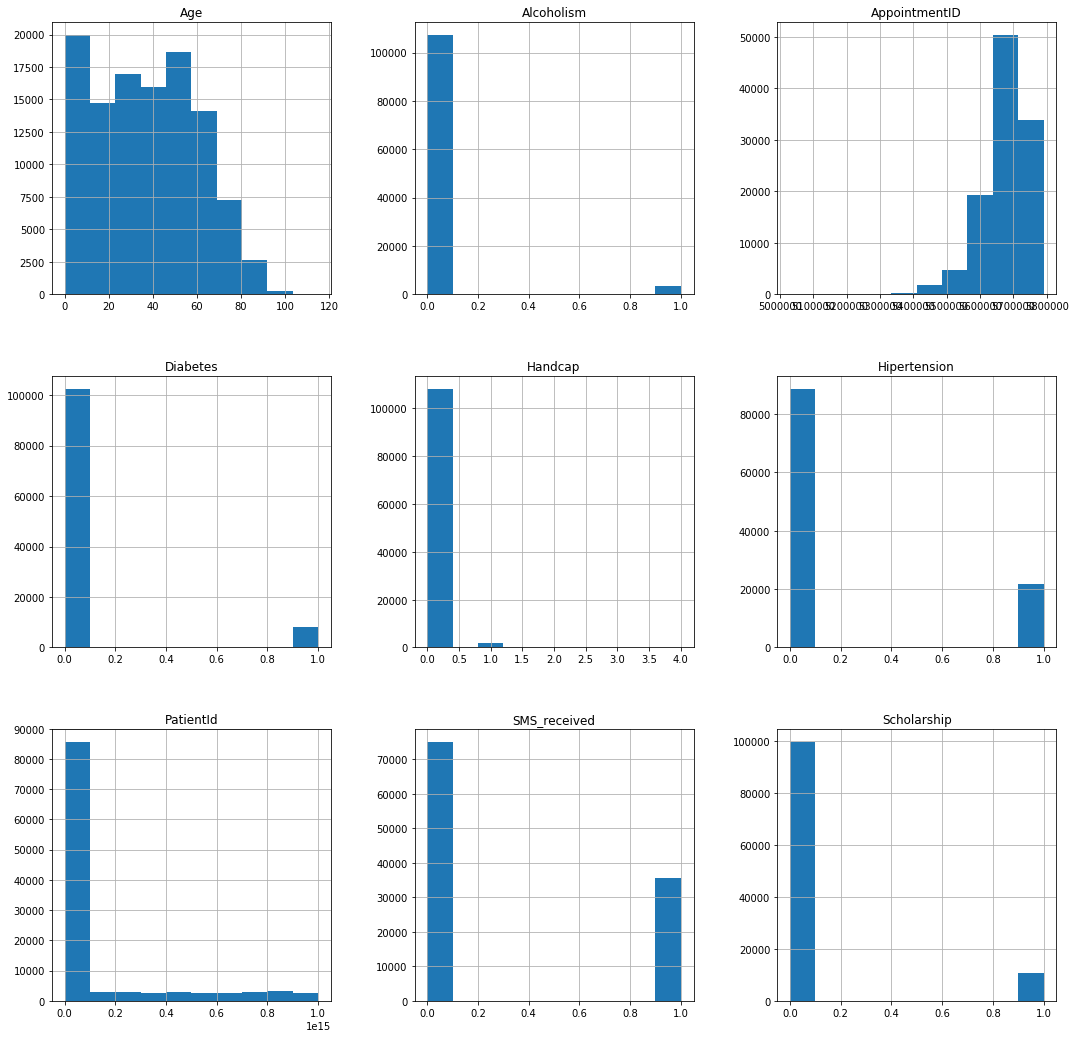

In [13]:
#show all data 
df.hist(figsize=(18,18))


### Data Cleaning
1- will check if thire is any missing value and remove them
2- check if thire id duplite and remove it 
3- Dropping Unecessary Columns

 

In [14]:
#to check if thir is missing data
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [15]:
#check if there is any duplicate 
df.duplicated().sum()

0

In [4]:
# drop unnecessary Columns
df.drop(['Neighbourhood','Hipertension','Diabetes','Alcoholism','Handcap',] ,axis=1 ,inplace=True)
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis






In [6]:
# function to show the precentge .
def percent(col):
    print((df[col].value_counts()/len(df)*100))

In [7]:
percent("Gender")

F    64.997693
M    35.002307
Name: Gender, dtype: float64


In [18]:
percent("SMS_received")

0    67.897146
1    32.102854
Name: SMS_received, dtype: float64


In [19]:
percent("No-show")

No     79.806561
Yes    20.193439
Name: No-show, dtype: float64


In [20]:
percent("Scholarship")

0    90.173353
1     9.826647
Name: Scholarship, dtype: float64


### General Exploration Results:
<ol>
    <li>majority of the patients are female. </li>
    <li> Present of those who missed the appointment is 20.19%</li>
    <li> 90% of the patients lacked a scholarship.</li>
    </ol>
    


### Does receiving a message increase the likelihood of appearing for the appointment?

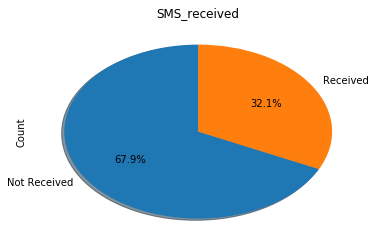

In [21]:

df["SMS_received"].value_counts().plot(kind="pie",labels=["Not Received","Received"],    autopct='%1.1f%%', shadow=True, startangle=90)
plt.ylabel("Count")
plt.title("SMS_received");

In [22]:

show_msg=df.groupby("SMS_received")["No-show"].value_counts()
show_msg

SMS_received  No-show
0             No         62509
              Yes        12535
1             No         25698
              Yes         9784
Name: No-show, dtype: int64

#### This table show that most of the patient Didn’t recive a messages ,also thire is a 35482 h of the people who received messages and 25698 of them did not attend,
#### and it follows from this that receiving messages does not contribute to an increase in attendance for the  appointment.

## What are the ages most committed to appearing for the date ؟

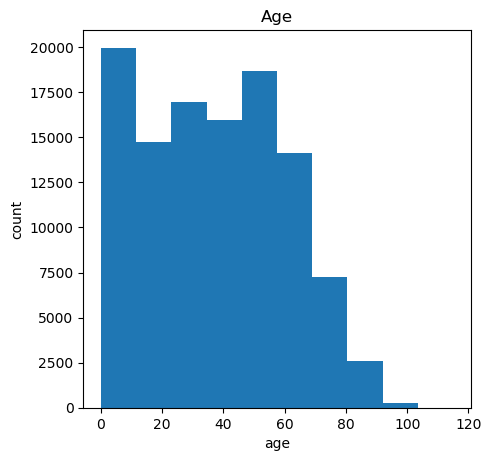

In [23]:
plt.figure(figsize=(5,5), dpi = 100)
# x-axis name
plt.xlabel('age')
# y-axis name 
plt.ylabel('count')
# the column will appear 
plt.hist(df['Age']);
plt.title("Age");

In [24]:
# divide ages into category 0 to 20 ,20 t 40 and so on
bins=[0,20,40,60,80,100]
df["Age_bin_20"] = pd.cut(df.Age, bins=bins)
# groub age and not showing 
Age_every_20 = df.groupby("Age_bin_20")["No-show"].value_counts()

In [25]:
Age_every_20

Age_bin_20  No-show
(0, 20]     No         21852
            Yes         6457
(20, 40]    No         22209
            Yes         6626
(40, 60]    No         24490
            Yes         5591
(60, 80]    No         14373
            Yes         2537
(80, 100]   No          2379
            Yes          466
Name: No-show, dtype: int64

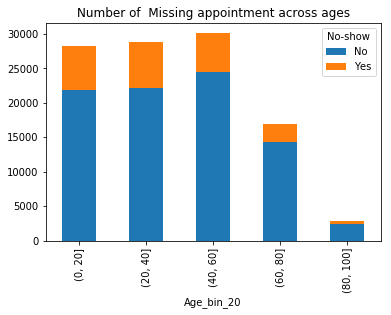

In [28]:
a=(Age_every_20).unstack().plot(kind="bar",stacked=True); 
plt.title("Number of  Missing appointment across ages");


##### This chart represents that ages between 60 to 100 are more likely to show for appointment 
##### also age between 20 to 40 is more likly to miss the appointment 


## Conclusions
<ol>
<li>The chart depicts probability for patients not appearing for the appointment  is high even if messages arrive and  Many of the disease did not receive messages</li>
<li>The patients 60 to 100 is more likly to show in Appointment.</li> 
    </ol>

## Limitations
1- the diffrent btween datatype make it difficult to apply opraiton on in two or more of columns 

## References
- [stack overflow](https://stackoverflow.com/)
- [pandas](https://pandas.pydata.org/docs/)
- [kaggle](https://www.kaggle.com/)

In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0